In [1]:
import matplotlib.pyplot as plt

from tools.tools import open_file, DF_TIME, DF_DATA_POINTS, DF_CHANNEL
from hplc.io import load_chromatogram
from hplc.quant import Chromatogram
import numpy as np
from scipy import stats

import os

time = 'time'
signal = 'signal'
base_path = '/home/schwan/syncthing/PD_MN/Experiments/HPLC/20231201_Run/'

In [2]:
files = [
    ('ID','Pos','Key',	        'Conc (mM)',	'Path',),
    (1, 	1,	'Solvent',	    np.nan,	'1_001_LongColumnLacAcetateRiboflavin4.met.asc',),
    (2,	    1,	'Solvent',	    np.nan,	'1_025_LongColumnLacAcetateRiboflavin4.met.asc',),
    (3,	    1,	'Solvent',  	np.nan,	'1_049_LongColumnLacAcetateRiboflavin4.met.asc',),
    (4,	    2,	'Solvent',	    np.nan,	'2_003_LongColumnLacAcetateRiboflavin4.met.asc',),
    (5,	    2,	'Solvent',  	np.nan,	'2_027_LongColumnLacAcetateRiboflavin4.met.asc',),
    (6,	    2,	'Solvent',  	np.nan,	'2_051_LongColumnLacAcetateRiboflavin4.met.asc',),
    (7,	    3,	'Solvent',	    np.nan,	'3_005_LongColumnLacAcetateRiboflavin4.met.asc',),
    (8,	    3,	'Solvent',	    np.nan,	'3_029_LongColumnLacAcetateRiboflavin4.met.asc',),
    (9,	    3,	'Solvent',	    np.nan,	'3_053_LongColumnLacAcetateRiboflavin4.met.asc',),
    (10,	4,	'Solvent',	    np.nan,	'4_007_LongColumnLacAcetateRiboflavin4.met.asc',),
    (11,	4,	'Solvent',	    np.nan,	'4_031_LongColumnLacAcetateRiboflavin4.met.asc',),
    (12,	4,	'Solvent',	    np.nan,	'4_055_LongColumnLacAcetateRiboflavin4.met.asc',),
    (13,	5,	'Solvent',	    np.nan,	'5_009_LongColumnLacAcetateRiboflavin4.met.asc',),
    (14,	5,	'Solvent',	    np.nan,	'5_033_LongColumnLacAcetateRiboflavin4.met.asc',),
    (15,	5,	'Solvent',	    np.nan,	'5_057_LongColumnLacAcetateRiboflavin4.met.asc',),
    (16,	6,	'Solvent',	    np.nan,	'6_011_LongColumnLacAcetateRiboflavin4.met.asc',),
    (17,	6,	'Solvent',	    np.nan,	'6_035_LongColumnLacAcetateRiboflavin4.met.asc',),
    (18,	6,	'Solvent',	    np.nan,	'6_059_LongColumnLacAcetateRiboflavin4.met.asc',),
    (19,	7,	'Solvent',	    np.nan,	'7_013_LongColumnLacAcetateRiboflavin4.met.asc',),
    (20,	7,	'Solvent',	    np.nan,	'7_037_LongColumnLacAcetateRiboflavin4.met.asc',),
    (21,	7,	'Solvent',	    np.nan,	'7_061_LongColumnLacAcetateRiboflavin4.met.asc',),
    (22,	8,	'Solvent',	    np.nan,	'8_015_LongColumnLacAcetateRiboflavin4.met.asc',),
    (23,	8,	'Solvent',	    np.nan,	'8_039_LongColumnLacAcetateRiboflavin4.met.asc',),
    (24,	8,	'Solvent',	    np.nan,	'8_063_LongColumnLacAcetateRiboflavin4.met.asc',),
    (25,	9,	'Solvent',	    np.nan,	'9_017_LongColumnLacAcetateRiboflavin4.met.asc',),
    (26,	9,	'Solvent',	    np.nan,	'9_041_LongColumnLacAcetateRiboflavin4.met.asc',),
    (27,	9,	'Solvent',	    np.nan,	'9_065_LongColumnLacAcetateRiboflavin4.met.asc',),
    (28,	10,	'Solvent',	    np.nan,	'10_019_LongColumnLacAcetateRiboflavin4.met.asc',),
    (29,	10,	'Solvent',	    np.nan,	'10_043_LongColumnLacAcetateRiboflavin4.met.asc',),
    (30,	11,	'Solvent',	    np.nan,	'11_021_LongColumnLacAcetateRiboflavin4.met.asc',),
    (31,	11,	'Solvent',	    np.nan,	'11_045_LongColumnLacAcetateRiboflavin4.met.asc',),
    (32,	12,	'Solvent',	    np.nan,	'12_023_LongColumnLacAcetateRiboflavin4.met.asc',),
    (33,	12,	'Solvent',	    np.nan,	'12_047_LongColumnLacAcetateRiboflavin4.met.asc',),
    (34,	13,	'Propionate',   20,	    '13_002_LongColumnLacAcetateRiboflavin4.met.asc',),
    (35,	14,	'Pyruvate',	    20,	    '14_004_LongColumnLacAcetateRiboflavin4.met.asc',),
    (36,	15,	'Succinate',    20,	    '15_006_LongColumnLacAcetateRiboflavin4.met.asc',),
    (37,	16,	'Media',	    np.nan,	'16_008_LongColumnLacAcetateRiboflavin4.met.asc',),
    (38,	17,	'Media',	    np.nan,	'17_010_LongColumnLacAcetateRiboflavin4.met.asc',),
    (39,	18,	'Acetate Propionate Lactate Pyruvate Succinate',	
                                10,	'18_012_LongColumnLacAcetateRiboflavin4.met.asc',),
    (40,	25,	'Acetate',	    20,	    '25_014_LongColumnLacAcetateRiboflavin4.met.asc',),
    (41,	26,	'Acetate',	    10,	    '26_016_LongColumnLacAcetateRiboflavin4.met.asc',),
    (42,	27,	'Acetate',	    5,	    '27_018_LongColumnLacAcetateRiboflavin4.met.asc',),
    (43,	28,	'Acetate',	    2.5,	'28_020_LongColumnLacAcetateRiboflavin4.met.asc',),
    (44,	29,	'Acetate',	    1.25,	'29_022_LongColumnLacAcetateRiboflavin4.met.asc',),
    (45,	30,	'Acetate',	    0.625,	'30_024_LongColumnLacAcetateRiboflavin4.met.asc',),
    (46,	37,	'Lactate',	    20,	    '37_026_LongColumnLacAcetateRiboflavin4.met.asc',),
    (47,	38,	'Lactate',	    10,	    '38_028_LongColumnLacAcetateRiboflavin4.met.asc',),
    (48,	39,	'Lactate',	    5,	    '39_030_LongColumnLacAcetateRiboflavin4.met.asc',),
    (49,	40,	'Lactate',	    2.5,	'40_032_LongColumnLacAcetateRiboflavin4.met.asc',),
    (50,	41,	'Lactate',	    1.25,	'41_034_LongColumnLacAcetateRiboflavin4.met.asc',),
    (51,	42,	'Lactate',	    0.625,	'42_036_LongColumnLacAcetateRiboflavin4.met.asc',),
    (52,	49,	'Succinate',	20,	    '49_038_LongColumnLacAcetateRiboflavin4.met.asc',),
    (53,	50,	'Succinate',	10,	    '50_040_LongColumnLacAcetateRiboflavin4.met.asc',),
    (54,	51,	'Succinate',	5,	    '51_042_LongColumnLacAcetateRiboflavin4.met.asc',),
    (55,	52,	'Succinate',	2.5,	'52_044_LongColumnLacAcetateRiboflavin4.met.asc',),
    (56,	53,	'Succinate',	1.25,	'53_046_LongColumnLacAcetateRiboflavin4.met.asc',),
    (57,	54,	'Succinate',	0.625,	'54_048_LongColumnLacAcetateRiboflavin4.met.asc',),
    (58,	61,	'Ch1',	        np.nan,	'61_050_LongColumnLacAcetateRiboflavin4.met.asc',),
    (59,	62,	'Ch2',	        np.nan,	'62_052_LongColumnLacAcetateRiboflavin4.met.asc',),
    (60,	63,	'Ch3',	        np.nan,	'63_054_LongColumnLacAcetateRiboflavin4.met.asc',),
    (61,	64,	'Ch4',	        np.nan,	'64_056_LongColumnLacAcetateRiboflavin4.met.asc',),
    (62,	65,	'Ch5',	        np.nan,	'65_058_LongColumnLacAcetateRiboflavin4.met.asc',),
    (63,	66,	'Ch6',	        np.nan,	'66_060_LongColumnLacAcetateRiboflavin4.met.asc',),
    (64,	67,	'Ch7',	        np.nan,	'67_062_LongColumnLacAcetateRiboflavin4.met.asc',),
    (65,	68,	'Ch8',	        np.nan,	'68_064_LongColumnLacAcetateRiboflavin4.met.asc',),

]
# Convert to full path
files = [(a, b, c, d, os.path.join(base_path, e)) for (a, b, c, d, e) in files]

# Check file exists
print(os.path.isfile(files[1][4]))

True


Deconvolving mixture: 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:955: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Succinate' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['peak_id'] == peak_id, 'compound'] = k
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:974: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'mM' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['compound'] ==
/tmp/ipykernel_32078/2466673967.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


   retention_time     scale       skew  amplitude        area  peak_id
0           13.15  0.300036   3.435961   0.205239   24.551302        1
0           15.03  0.191101   1.403455   2.571556  308.586777        2
0           16.25  0.173956  -0.964972   1.168573  140.228731        3
0           17.74  2.344401 -19.538913   1.756620  201.769549        4
0           19.18  0.312089  -0.000398   5.230591  627.670931        5
0           20.72  0.259451  -0.818795   2.212373  265.484754        6


Deconvolving mixture: 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:955: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Succinate' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['peak_id'] == peak_id, 'compound'] = k
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:974: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'mM' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['compound'] ==
/tmp/ipykernel_32078/2466673967.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


   retention_time     scale      skew  amplitude         area  peak_id
0           15.02  0.195749  1.472297   8.865529  1063.863455        1
0           16.32  0.263592 -1.490083   1.823633   218.835926        2
0           19.39  0.328924 -0.919444   5.747592   689.711067        3
0           20.77  0.294069 -1.192240   2.483455   298.014597        4


Deconvolving mixture: 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:955: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Succinate' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['peak_id'] == peak_id, 'compound'] = k
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:974: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'mM' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['compound'] ==
/tmp/ipykernel_32078/2466673967.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


   retention_time     scale      skew  amplitude         area  peak_id
0           13.21  0.215304  1.892607   0.443635    53.098413        1
0           15.00  3.479167  6.027222   2.522522   289.336100        2
0           16.08  0.170589  0.803472   1.846667   221.600058        3
0           19.03  0.309109  2.188014   9.363826  1123.659073        4
0           20.73  0.256904 -0.899687   2.330578   279.669307        5


Deconvolving mixture: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:955: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Succinate' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['peak_id'] == peak_id, 'compound'] = k
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:974: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'mM' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['compound'] ==
/tmp/ipykernel_32078/2466673967.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


   retention_time     scale       skew   amplitude          area  peak_id
0           15.03  0.191767   1.457889   26.002753   3120.330405        1
0           16.34  0.257366  -1.504382    4.195930    503.511630        2
0           18.74  0.234689   1.384255  150.927615  18111.313792        3
0           20.97  2.193780 -22.391750   15.207900   1824.436635        4


Deconvolving mixture: 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:955: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Succinate' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['peak_id'] == peak_id, 'compound'] = k
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:974: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'mM' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['compound'] ==
/tmp/ipykernel_32078/2466673967.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


   retention_time     scale      skew  amplitude         area  peak_id
0           13.21  0.211584  1.818977   0.478037    57.226948        1
0           15.11  3.470833  4.477687   2.839000   324.587896        2
0           16.09  0.163000  0.669139   1.951861   234.223366        3
0           19.02  0.286524  2.112795  12.330995  1479.719420        4
0           20.74  0.274368 -1.109918   2.728361   327.403321        5


Deconvolving mixture: 100%|██████████| 1/1 [00:00<00:00, 25.91it/s]
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:955: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Succinate' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['peak_id'] == peak_id, 'compound'] = k
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:962: UserWarning: 
No peak found for Lactate (retention time 16.3) within the provided tolerance.
  warnings.warn(
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:974: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'mM' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['compound'] ==
/tmp/ipykernel_32078/2

   retention_time     scale      skew   amplitude          area  peak_id
0           15.02  0.192533  1.461292   23.751208   2850.144909        1
0           18.74  0.231424  1.249345  352.179487  42261.538498        2


Deconvolving mixture: 100%|██████████| 2/2 [00:00<00:00, 99.36it/s]
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:955: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Succinate' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['peak_id'] == peak_id, 'compound'] = k
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:962: UserWarning: 
No peak found for Lactate (retention time 16.3) within the provided tolerance.
  warnings.warn(
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:974: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'mM' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['compound'] ==
/tmp/ipykernel_32078/2

   retention_time     scale      skew   amplitude          area  peak_id
0           15.03  0.191625  1.471029   30.209613   3625.153516        1
0           18.74  0.236968  1.278130  495.185494  59422.259221        2


Deconvolving mixture: 100%|██████████| 2/2 [00:00<00:00, 26.32it/s]
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:955: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Succinate' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['peak_id'] == peak_id, 'compound'] = k
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:974: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'mM' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['compound'] ==
/tmp/ipykernel_32078/2466673967.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


   retention_time     scale       skew  amplitude         area  peak_id
0           15.32  0.290649  -1.475800   0.972410   116.689162        1
0           16.05  0.203262   0.849254   1.804274   216.512892        2
0           19.26  0.215978  -0.986963  43.474242  5216.909084        3
0           20.91  1.566667 -15.077048   5.075625   609.074697        4


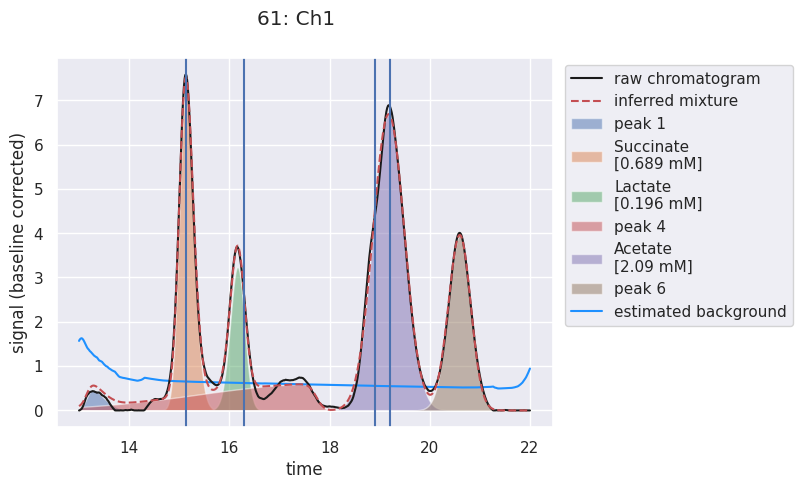

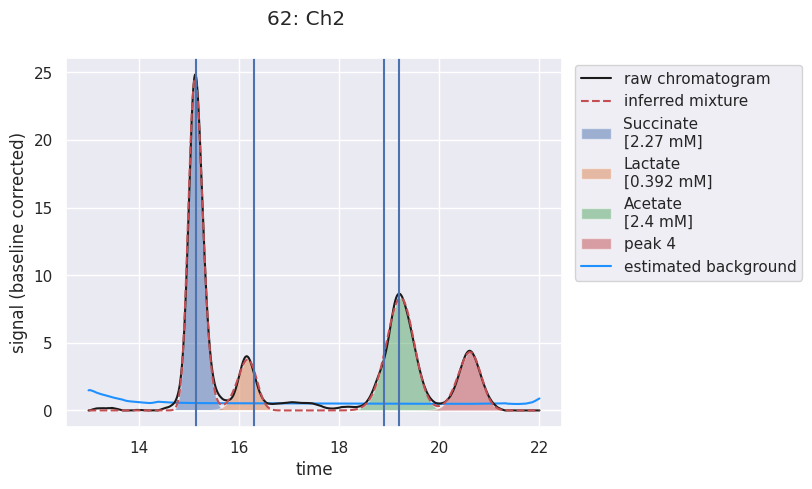

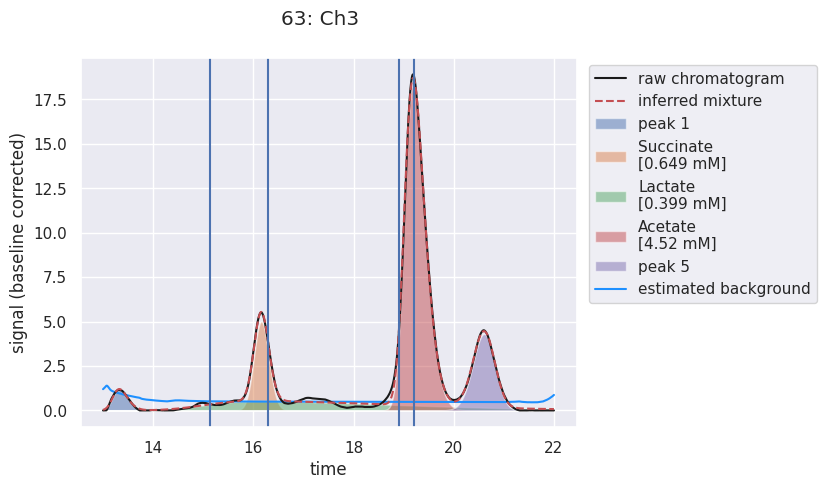

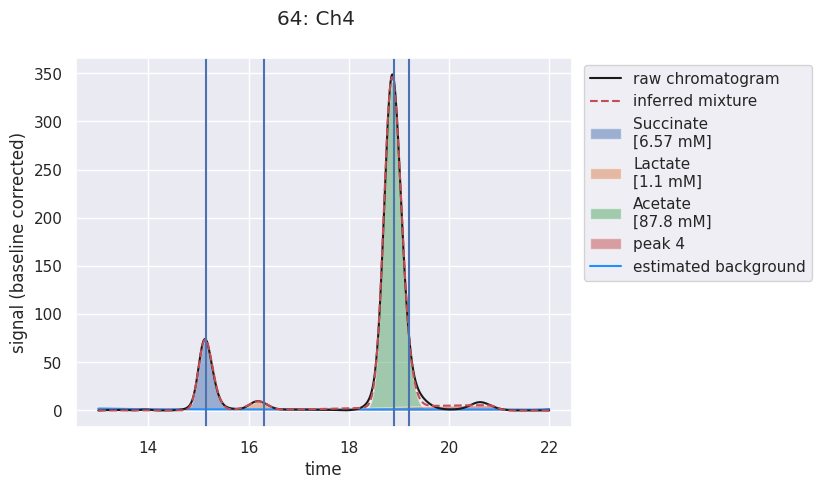

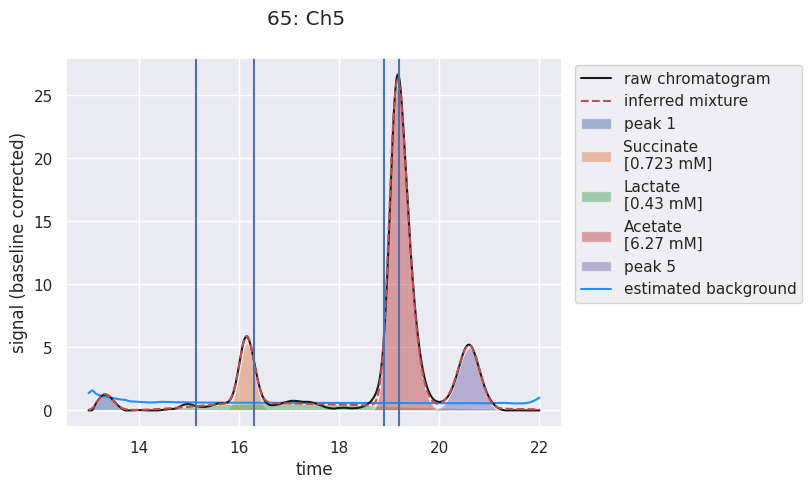

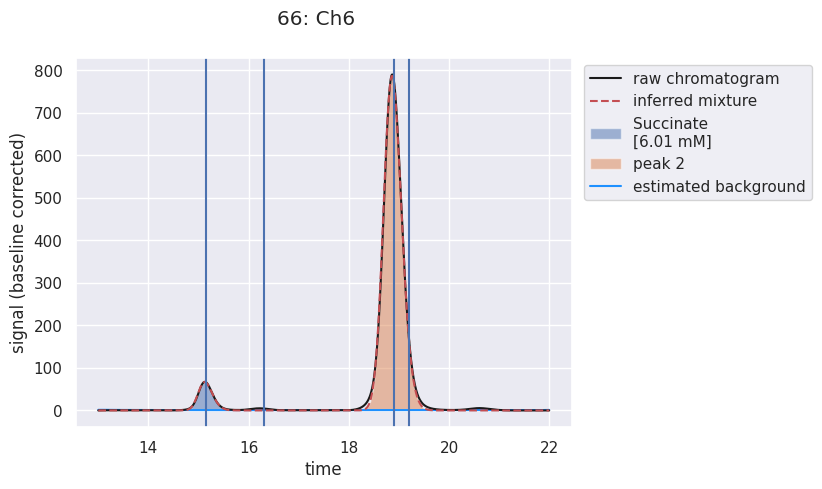

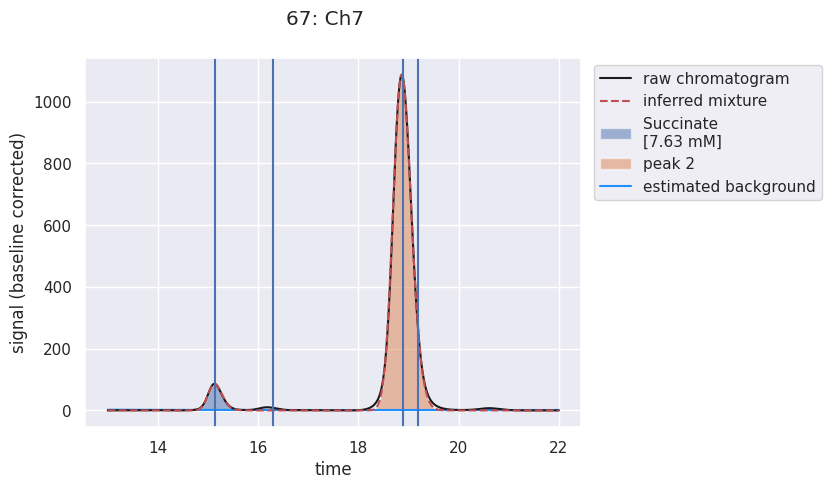

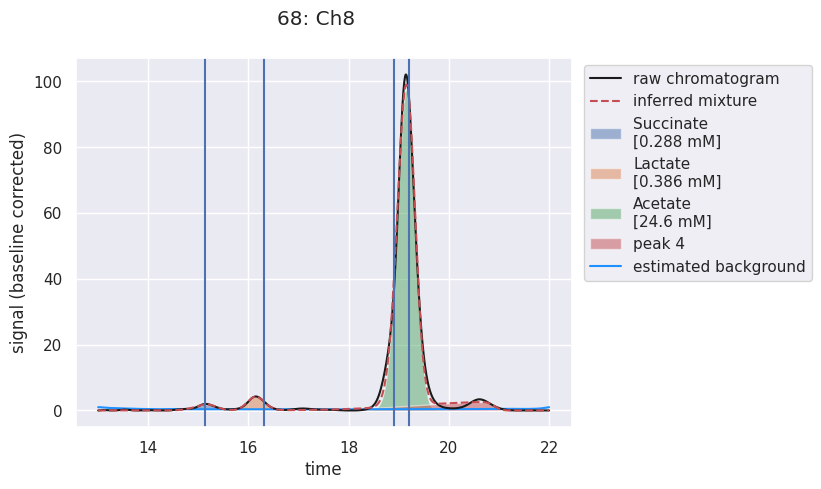

In [3]:
channel = 0
# for i in [34, 35, 36, 37, 39, 40, 46, 52, ]:
tolerance = .5


succinate = 15.14
lactate = 16.3
acetate = 19.2

calibration = {
        'Succinate': {
            'retention_time': succinate,  # 15.02
            'slope': 478.03774684861406,
            'intercept': -20.880668194030022,
            'unit': 'mM'
        },
        'Lactate': {
            'retention_time': lactate,  # 16.22
            'slope': 401.39799381606240,
            'intercept': 61.60040391542361,
            'unit': 'mM'
        },
        'Acetate': {
            'retention_time': acetate,  # 19.06
            'slope': 203.92102211290327,
            'intercept': 200.97804362500005,
            'unit': 'mM'
        },
    }

# for _, pos, sample, conc, path in files[37:40]:
for _, pos, sample, conc, path in files[58:]:
    # _, pos, sample, conc, path = files[i]
    _, df_all = open_file(path)
    
    df_all[DF_TIME] = df_all[DF_TIME] / 60
    df = df_all.loc[df_all[DF_CHANNEL] == channel, [DF_TIME, DF_DATA_POINTS]].rename(columns={
        DF_TIME: time,
        DF_DATA_POINTS: signal,
    })
    chrom = Chromatogram(df)
    chrom.crop([13, 22])
    peaks = chrom.fit_peaks(
        # buffer=0,
        # prominence=.05, 
        known_peaks=[
            # lactate,
            # succinate,
            # 18.9,
            # acetate,
        ],
        # tolerance=tolerance,
        verbose=True,
    )
    try:
        quant_peaks = chrom.map_peaks(
            calibration,
            loc_tolerance=tolerance,
            include_unmapped=True,
        )
    except ValueError as exc:
        print(f"ERROR {pos}: {sample}: ", exc)
        
    title = f"{pos}: {sample}"
    if conc is not np.nan:
        title += f" ({conc} mM)"
    print(peaks.head(100))
    res = title + '\n' + str(peaks.head(100)) + '\n'
    # with open(os.path.join(base_path, '20231204_peak_height_results.txt'), 'a+') as f:
    #     f.write(res)
    fig = chrom.show()[0]
    ax = fig.axes[0]
    for i in [
            acetate,
            lactate,
            succinate,
            18.9,
        ]:
        ax.axvline(i)
    
    fig.suptitle(title)
    fig.show()


In [151]:
acetate = np.array([20, 10, 5, 2.5, 1.25, ])  # milliMolar
acetate_area = np.array([4285.170401, 2236.054858, 1202.150905, 708.432467, 475.021194, ])
result = stats.linregress(acetate, acetate_area)
print('Acetate\n', result)


lactate = np.array([20, 10, 5, 2.5, 1.25, .625]) # milliMolar
lactate_area = np.array([8092.446488, 4068.540075, 2066.531538, 1071.922318, 573.410518, 301.797493, ])
result = stats.linregress(lactate, lactate_area)
print('Lactate\n', result)

lactate = np.array([20, 10, 5, 2.5, 1.25, .625 ]) # microMolar
lactate_area = np.array([9562.879958, 4717.092591, 2346.957868, 1187.384475, 616.492347, 266.645034])
result = stats.linregress(lactate, lactate_area)
print('Succinate\n', result)

Acetate
 LinregressResult(slope=203.92102211290327, intercept=200.97804362500005, rvalue=0.9999605911390463, pvalue=2.969765200342665e-07, stderr=1.045264371839151, intercept_stderr=10.790171511602823)
Lactate
 LinregressResult(slope=401.3979938160624, intercept=61.60040391542361, rvalue=0.9999963413325522, pvalue=2.0078746752998648e-11, stderr=0.5429037726816927, intercept_stderr=5.117920995300157)
Succinate
 LinregressResult(slope=478.03774684861406, intercept=-20.880668194030022, rvalue=0.9999624773347865, pvalue=2.1118991920616063e-09, stderr=2.070647890890013, intercept_stderr=19.519872301335628)


/tmp/ipykernel_32078/4017872313.py:95: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_32078/4017872313.py:95: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_32078/4017872313.py:95: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_32078/4017872313.py:95: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_32078/4017872313.py:95: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_32078/4017872313.py:

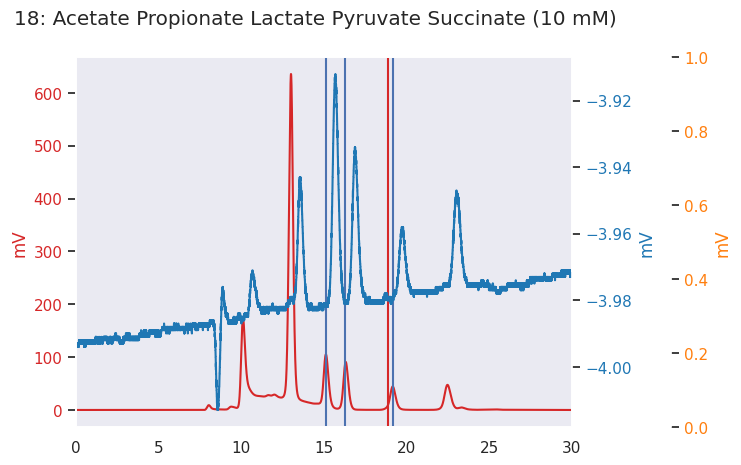

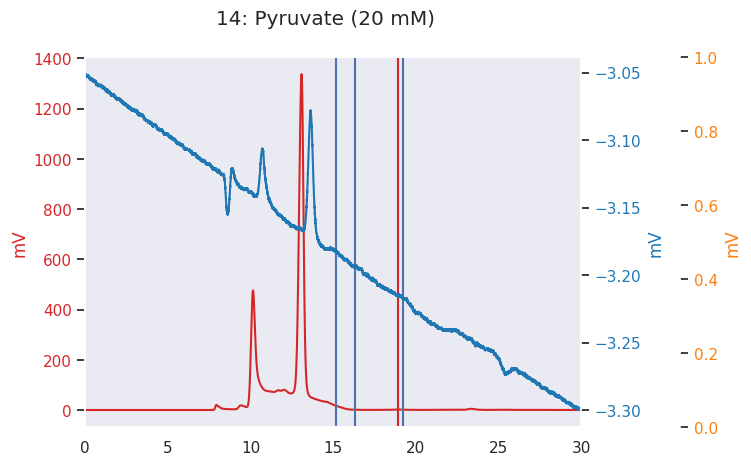

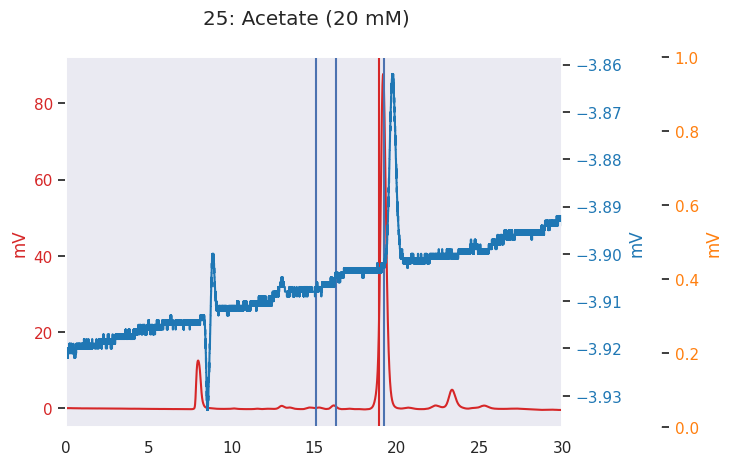

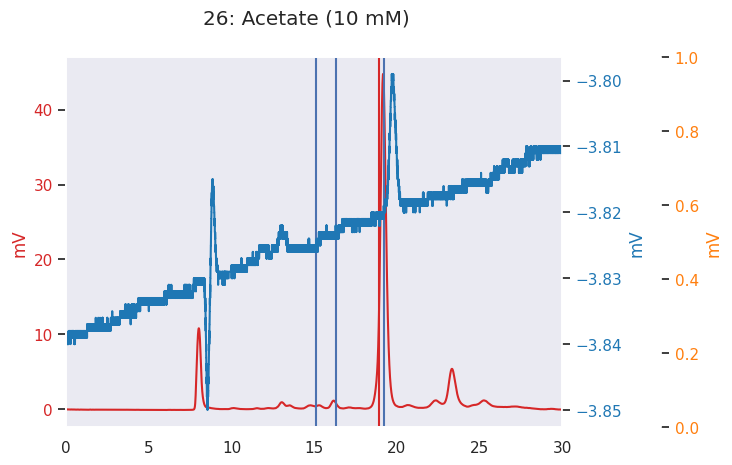

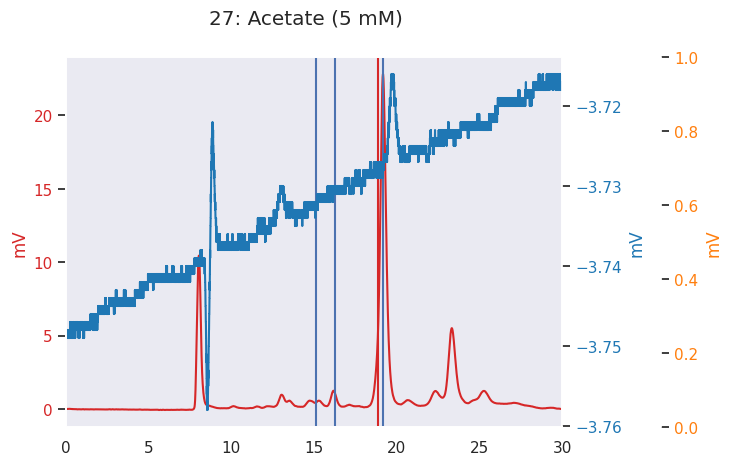

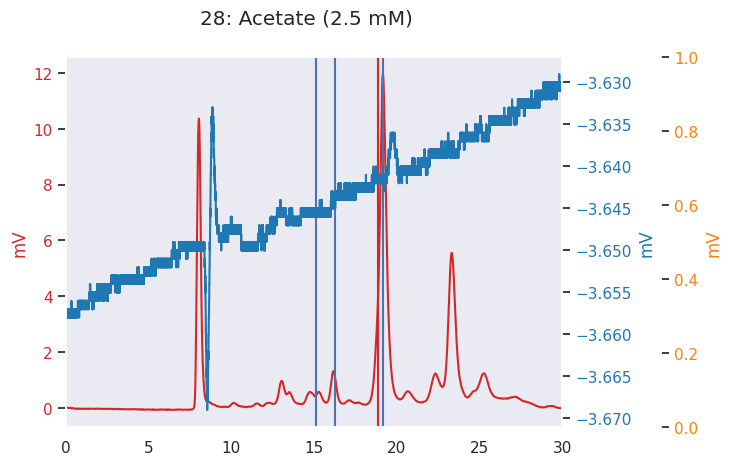

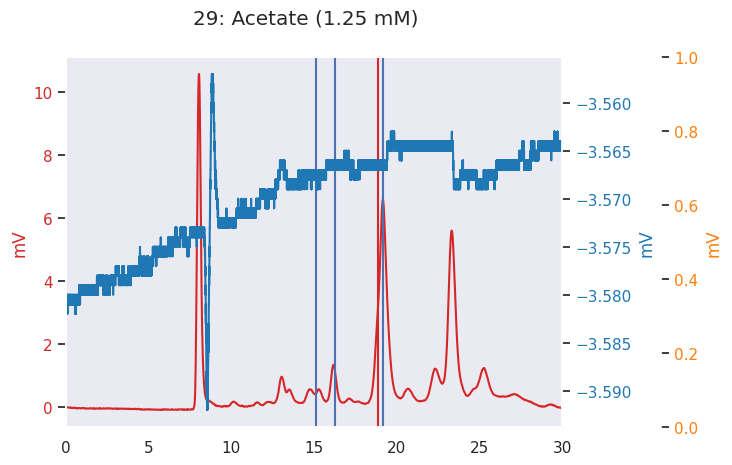

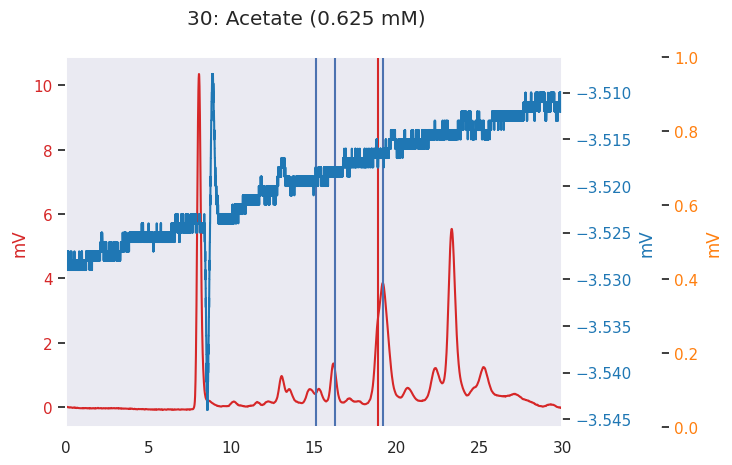

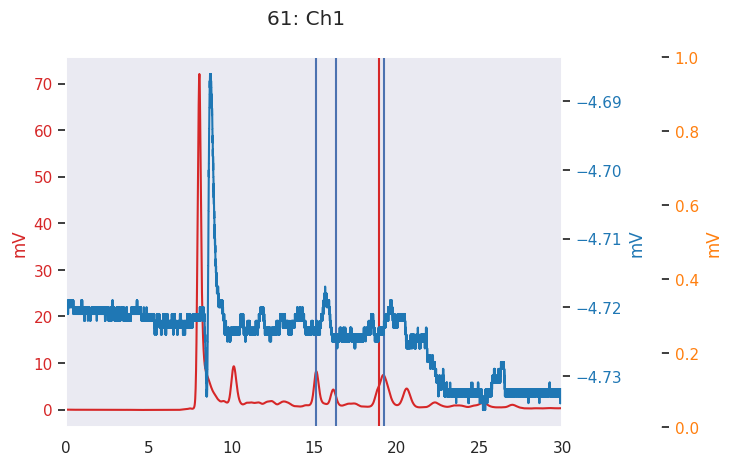

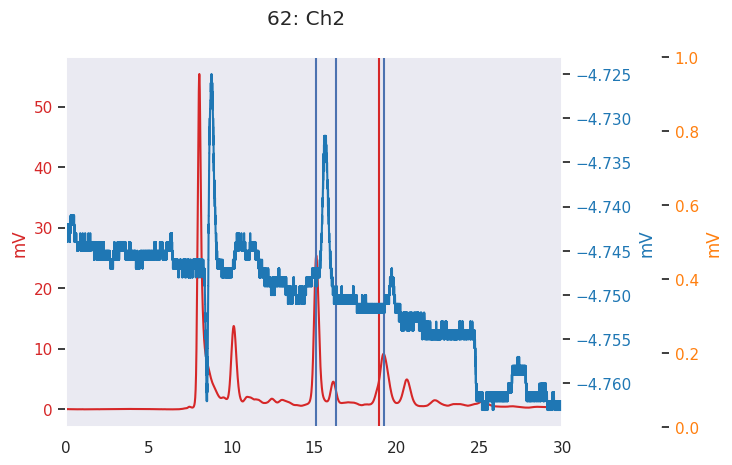

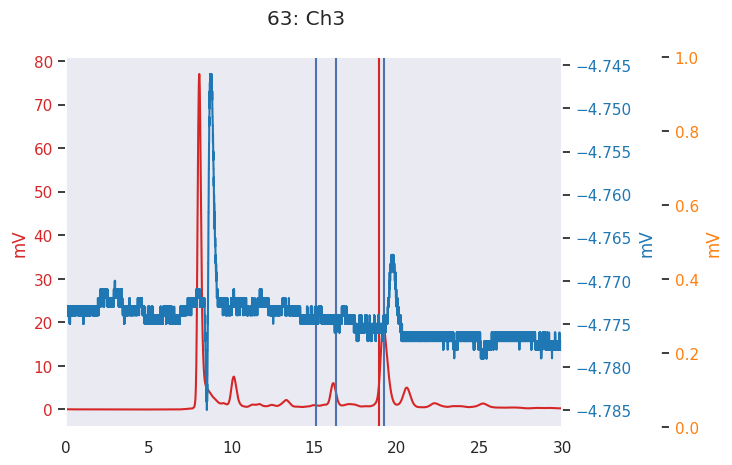

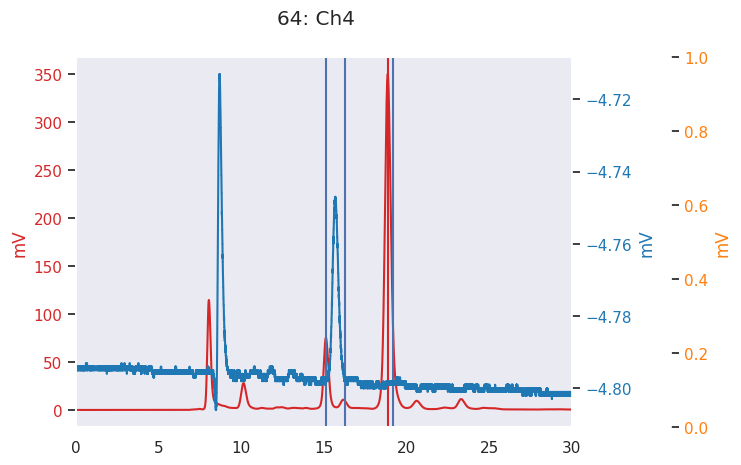

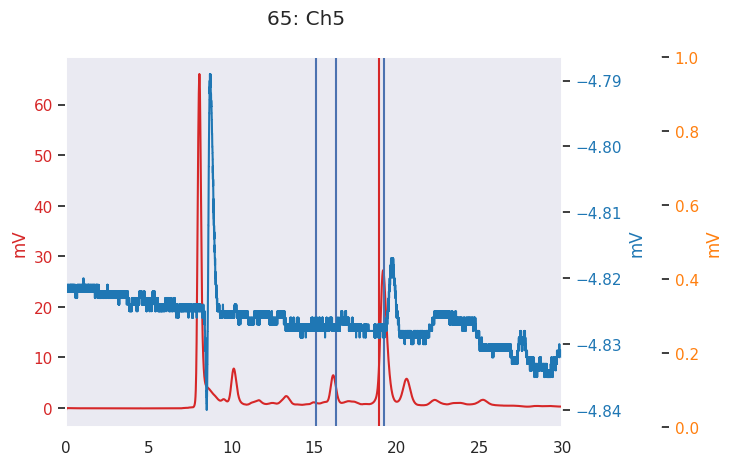

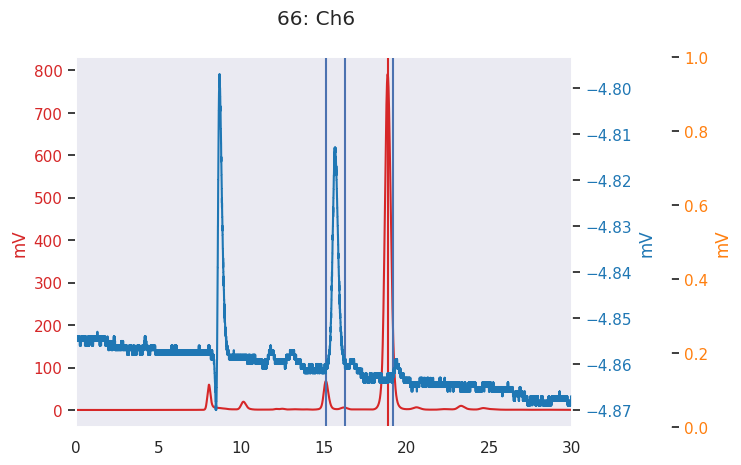

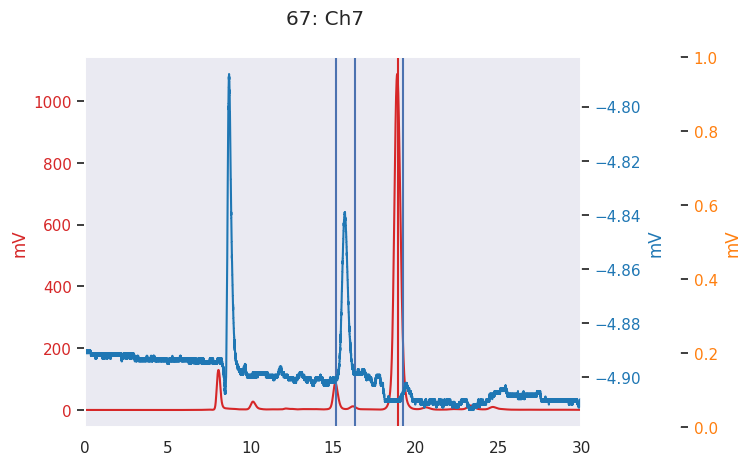

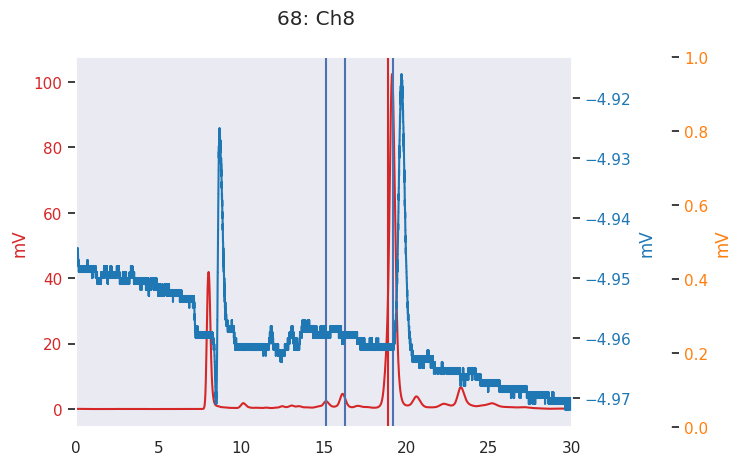

In [4]:
channel = 2
# for i in [34, 35, 36, 37, 39, 40, 46, 52, ]:
tolerance = .5


succinate = 15.14
lactate = 16.3
acetate = 19.2

x_min, x_max = 0, 30

calibration = {
        'Succinate': {
            'retention_time': succinate,  # 15.02
            'slope': 478.03774684861406,
            'intercept': -20.880668194030022,
            'unit': 'mM'
        },
        'Lactate': {
            'retention_time': lactate,  # 16.22
            'slope': 401.39799381606240,
            'intercept': 61.60040391542361,
            'unit': 'mM'
        },
        'Acetate': {
            'retention_time': acetate,  # 19.06
            'slope': 203.92102211290327,
            'intercept': 200.97804362500005,
            'unit': 'mM'
        },
    }

# for _, pos, sample, conc, path in files[37:40]:
tf = [files[39]] + [files[35]] + files[40:46] + files[58:]
for _, pos, sample, conc, path in tf:
    # _, pos, sample, conc, path = files[i]
    _, df_all = open_file(path)
    
    fig, ax = plt.subplots(1, 1)

    df_all[DF_TIME] = df_all[DF_TIME] / 60
    df_all = df_all.loc[
         (df_all[DF_TIME] >= x_min) & (df_all[DF_TIME] <= x_max), :
    ]
    ax.set_xlim([x_min, x_max])
    color = 'tab:red'
    ax.set_ylabel('mV', color=color)
    ax.plot(
        df_all.loc[df_all[DF_CHANNEL] == 0, [DF_TIME]],
        df_all.loc[df_all[DF_CHANNEL] == 0, [DF_DATA_POINTS]], 
        color=color,
    )
    ax.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('mV', color=color)
    # ax2.set_xlim([x_min, x_max])    
    ax2.plot(
        df_all.loc[df_all[DF_CHANNEL] == channel, [DF_TIME]],
        df_all.loc[df_all[DF_CHANNEL] == channel, [DF_DATA_POINTS]],
        color=color,
    )
    ax2.tick_params(axis='y', labelcolor=color)

    ax3 = ax.twinx()
    ax3.spines["right"].set_position(("axes", 1.2))
    color = 'tab:orange'
    ax3.set_ylabel('mV', color=color)
    # ax3.set_xlim([x_min, x_max])    
    # ax3.plot(
    #     df_all.loc[df_all[DF_CHANNEL] == 1, [DF_TIME]],
    #     df_all.loc[df_all[DF_CHANNEL] == 1, [DF_DATA_POINTS]],
    #     color=color,
    # )
    ax3.tick_params(axis='y', labelcolor=color)
    
    title = f"{pos}: {sample}"
    if conc is not np.nan:
        title += f" ({conc} mM)"
    # with open(os.path.join(base_path, '20231204_peak_height_results.txt'), 'a+') as f:
    #     f.write(res)
    
    for i in [
            acetate,
            lactate,
            succinate,
        ]:
        ax.axvline(i)
    ax.axvline(18.9, c='tab:red')
    ax.grid(False)
    ax2.grid(False)
    ax3.grid(False)
    fig.suptitle(title)
    fig.show()


In [237]:
channel = 2
# for i in [34, 35, 36, 37, 39, 40, 46, 52, ]:
tolerance = .5


succinate = 15.14
lactate = 16.3
acetate = 19.2

calibration = {
        'Succinate': {
            'retention_time': succinate,  # 15.02
            'slope': 478.03774684861406,
            'intercept': -20.880668194030022,
            'unit': 'mM'
        },
        'Lactate': {
            'retention_time': lactate,  # 16.22
            'slope': 401.39799381606240,
            'intercept': 61.60040391542361,
            'unit': 'mM'
        },
        'Acetate': {
            'retention_time': acetate,  # 19.06
            'slope': 203.92102211290327,
            'intercept': 200.97804362500005,
            'unit': 'mM'
        },
    }

# for _, pos, sample, conc, path in files[37:40]:
for _, pos, sample, conc, path in files[40:46]:
    # _, pos, sample, conc, path = files[i]
    _, df_all = open_file(path)
    
    df_all[DF_TIME] = df_all[DF_TIME] / 60
    df = df_all.loc[df_all[DF_CHANNEL] == channel, [DF_TIME, DF_DATA_POINTS]].rename(columns={
        DF_TIME: time,
        DF_DATA_POINTS: signal,
    })
    df[signal] = df[signal] + abs(df[signal].min())
    print(df.describe())
    chrom = Chromatogram(df)
    chrom.crop([18, 21])
    peaks = chrom.fit_peaks(
        buffer=0,
        # prominence=.05, 
        # known_peaks=[
        #     # lactate,
        #     # succinate,
        #     # 18.9,
        #     # acetate,
        # ],
        # tolerance=tolerance,
        verbose=True,
    )
    # try:
    #     quant_peaks = chrom.map_peaks(
    #         calibration,
    #         loc_tolerance=tolerance,
    #         include_unmapped=True,
    #     )
    # except ValueError as exc:
    #     print(f"ERROR {pos}: {sample}: ", exc)
        
    title = f"{pos}: {sample}"
    if conc is not np.nan:
        title += f" ({conc} mM)"
    print(peaks.head(100))
    res = title + '\n' + str(peaks.head(100)) + '\n'
    # with open(os.path.join(base_path, '20231204_peak_height_results.txt'), 'a+') as f:
    #     f.write(res)
    fig = chrom.show()[0]
    ax = fig.axes[0]
    # for i in [
    #         acetate,
    #         lactate,
    #         succinate,
    #         18.9,
    #     ]:
    #     ax.axvline(i)
    
    fig.suptitle(title)
    fig.show()

               time        signal
count  24001.000000  24001.000000
mean      20.000000      0.030845
std       11.547727      0.011095
min        0.000000      0.000000
25%       10.000000      0.022000
50%       20.000000      0.031000
75%       30.000000      0.040000
max       40.000000      0.071000


Deconvolving mixture:   0%|          | 0/11 [00:00<?, ?it/s]


ValueError: Each lower bound must be strictly less than each upper bound.